# Homework 1
## Data Mining (95-791) - Fall 2021
### Name: Yifan Zhou
#### Due date: Due date: Friday, October 29th, before 11:59 PM


### Changing the author field and file name.

 (a) Change the `name:` field on the Jupyter Notebook from Your Name Here to your own name.

 (b) Rename this file to "Homework1_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


For this problem we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)


In [1]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

---

### 1. Data pre-processing [8 pts]
Let's start by loading and pre-processing our dataset.

**1)a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows.** [1pt]

In [2]:
bikes = pd.read_csv('daily_citi_bike_trip_counts_and_weather.csv')
bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


**1)b) Check that there are no missing values in your dataset. If they are, take care of them appropriately.** [1pt]


In [3]:
print(bikes.info()) # check which column has NaN values -- average_wind_speed
print(bikes[bikes.isnull().values]) # show the rows that have NaN values
bikes.fillna({'average_wind_speed': bikes['average_wind_speed'].mean()})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trips                852 non-null    int64  
 1   precipitation        852 non-null    float64
 2   snow_depth           852 non-null    float64
 3   snowfall             852 non-null    float64
 4   max_temperature      852 non-null    float64
 5   min_temperature      852 non-null    float64
 6   average_wind_speed   849 non-null    float64
 7   year                 852 non-null    int64  
 8   season               852 non-null    object 
 9   month                852 non-null    int64  
 10  holiday              852 non-null    bool   
 11  stations_in_service  852 non-null    int64  
 12  weekday              852 non-null    bool   
 13  weekday_non_holiday  852 non-null    bool   
dtypes: bool(3), float64(6), int64(4), object(1)
memory usage: 75.8+ KB
None
     trips  precip

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.908020,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.473870,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.355400,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.144950,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.355400,2013,summer,8,False,329,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,13291,0.000000,0.0,0.0,60.08,41.00,2.908020,2015,fall,11,True,474,True,False
848,22824,0.000000,0.0,0.0,64.04,51.08,3.802790,2015,fall,11,True,474,True,False
849,15830,0.019685,0.0,0.0,64.04,44.96,5.254561,2015,fall,11,False,474,False,False
850,18452,0.000000,0.0,0.0,48.92,37.94,5.254561,2015,fall,11,False,474,False,False


**1)c) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays.** [2pt]

In [4]:
bikes_end = bikes[bikes['weekday'] == False]
bikes_day = bikes[bikes['weekday'] == True]

**1)d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain.** [4pts]

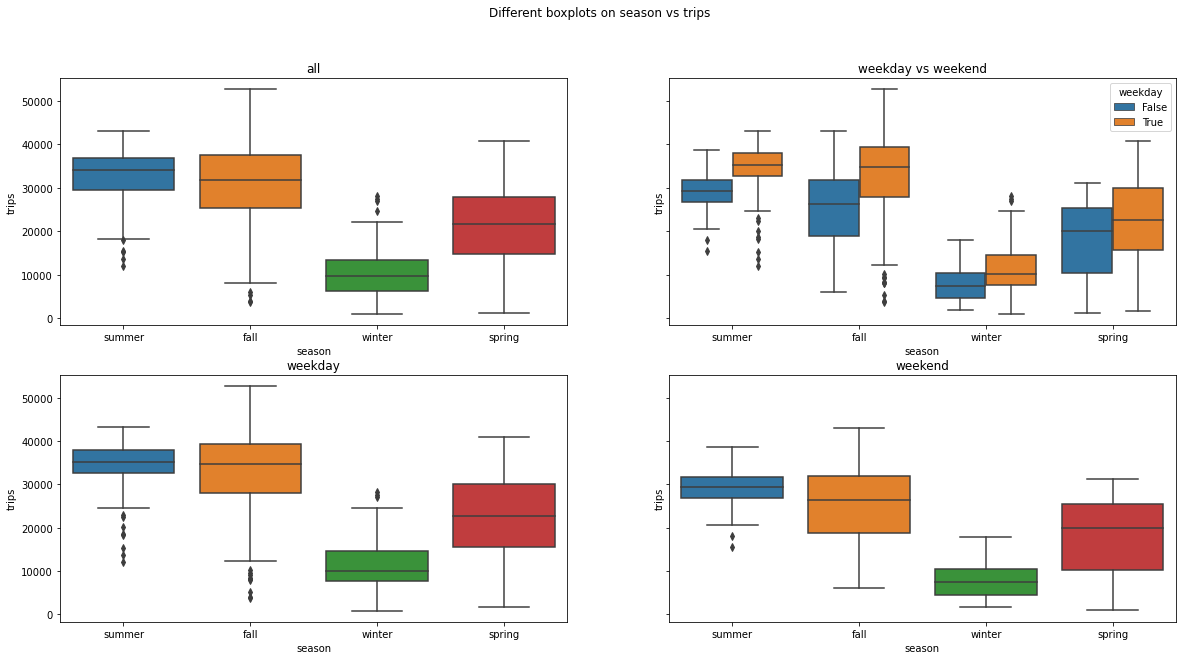

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Different boxplots on season vs trips')

sns.axes_style("whitegrid") 
sns.boxplot(ax=axes[0,0],x = 'season', y = 'trips', data = bikes)
axes[0, 0].set_title('all')

sns.axes_style("whitegrid") 
sns.boxplot(ax=axes[0,1],x = 'season', y = 'trips', hue = 'weekday', data = bikes)
axes[0, 1].set_title('weekday vs weekend')

sns.axes_style("whitegrid") 
sns.boxplot(ax=axes[1,0],x = 'season', y = 'trips', data = bikes_day)
axes[1, 0].set_title('weekday')

sns.axes_style("whitegrid") 
sns.boxplot(ax=axes[1,1],x = 'season', y = 'trips', data = bikes_end)
axes[1, 1].set_title('weekend')

plt.show()

--> *There appears a difference in the distribution of trips between seasons and weekdays versus weekends. It's because the means vary. However, there isn't much difference between summer and fall overall. The difference between summer and fall become more obvious on weekends than weekdays.*

## Problem 2: Qualitative predictors [9 pts]

> The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

**2)a) Fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. Use your weekdays dataset.** [2pt]


In [6]:
import statsmodels.formula.api as smf

In [7]:
lm = smf.ols(formula = 'trips ~ season', data = bikes_day).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     261.4
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          1.07e-108
Time:                        22:41:20   Log-Likelihood:                -6333.7
No. Observations:                 608   AIC:                         1.268e+04
Df Residuals:                     604   BIC:                         1.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.353e+04    581.221  

**2)b) How many total coefficients are there in the model? What does each coefficient correspond to?** [2pt]

--> *There are 4 coefficients. The first is the intercept. The rest represents the bargin effects of the 3 seasons compared to fall. *

**2)c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes.** [2pt]

--> *Take spring for an example. Compared to Fall, people in the spring will share less bikes per day by 1.096e+04.*

**2)d) Repeat 2)a) to 2)c) with your weekends dataset. What difference can you see from 2)a)'s model?** [3pt]

In [8]:
lm_end = smf.ols(formula = 'trips ~ season', data = bikes_end).fit()
print(lm_end.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     105.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.60e-43
Time:                        22:41:20   Log-Likelihood:                -2499.5
No. Observations:                 244   AIC:                             5007.
Df Residuals:                     240   BIC:                             5021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.577e+04    776.459  

--> *The absolute value of coefs of spring and winter has decreased, which suggests their influences in weekends are less than in weekdays.
The coef of summer becomes significant in weekends, which means that people are more effected by summer in weekends. This is probably because people travel more to hang out in summer due to the desirable weather.*

---

## Problem 3: Multiple linear regression [8 pts]

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

**3)a) Fit a regression model with trips as the target variable and the following variables as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month** [2pt]


In [9]:
lm_multi = smf.ols(formula = 'trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month ', data = bikes_day).fit()
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     332.2
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          3.70e-187
Time:                        22:41:20   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     601   BIC:                         1.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5252.4304   1205.888     

**3)b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model.** [2pt]

--> *Holding other variables constant, one unit increase in snow_depth changes the bike trips by -280.4113.

Holding other variables constant, the bike trips in snowfall days are 71.3863 less than in days that don't snow.

Holding other variables constant, one unit increase in min_temperature changes the bike trips by -11.1556.

Holding other variables constant, one unit increase in max_temperature changes the bike trips by 460.9413.

Holding other variables constant, one unit increase in precipitation changes the bike trips by -8226.5494.

Holding other variables constant, one unit increase in month changes the bike trips by 661.0439.*

**3)c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve?** [2pt]

In [10]:
lm_multi = smf.ols(formula = 'trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month + average_wind_speed', data = bikes_day).fit()
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     288.5
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          2.28e-187
Time:                        22:41:21   Log-Likelihood:                -6138.6
No. Observations:                 608   AIC:                         1.229e+04
Df Residuals:                     600   BIC:                         1.233e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1943.0941   1739

--> *I added the average wind speed because the stronger the wind is, the more resistance people will have and they are unwilling to reid.The R-squared of the model improved by 0.002. *

**3)d) From 3)c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership?** [1pt]

In [11]:
lm_multi = smf.ols(formula = 'trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month + average_wind_speed', data = bikes_day).fit()
print('Predictors associated with increased ridership: ')
for i in lm_multi.params[1:][lm_multi.params[1:]>0].index:
    print(i)
print('')
print('Predictors associated with decreased  ridership: ')
for i in lm_multi.params[1:][lm_multi.params[1:]<0].index:
    print(i)

Predictors associated with increased ridership: 
snowfall
max_temperature
month

Predictors associated with decreased  ridership: 
snow_depth
min_temperature
precipitation
average_wind_speed


**3)e) Which predictors are statistically significant (95% confidence interval)?** [1pt]

In [12]:
for i in lm_multi.pvalues[1:][lm_multi.pvalues < 0.05].index:
    print(i)

snow_depth
max_temperature
precipitation
month
average_wind_speed


## Problem 4: Dealing with collinearity [6 pts]

As you probably already know from your most recent regression class, highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

**4)a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another.** [1pt]


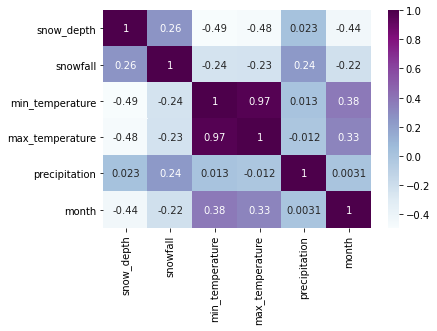

In [13]:
variables = bikes_day[['snow_depth','snowfall', 'min_temperature','max_temperature', 'precipitation', 'month']]
sns.heatmap(variables.corr(), annot=True, cmap="BuPu")
plt.show()

--> *The correlation between (max_temperature, min_temperature) is high (0.97).*

**4)b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated?** [1pt]

--> *The min_temperature of a summer day is higher than that of a winter day, so is the max_temperature. Therefore, mix and min temperature are correlated.*

**4) c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model.** [2pt]

In [14]:
lm_multi = smf.ols(formula = 'trips ~ snow_depth + snowfall + min_temperature + precipitation + month ', data = bikes_day).fit()
print(lm_multi.params)

Intercept          1616.549105
snow_depth         -318.236713
snowfall            -76.633733
min_temperature     467.337615
precipitation     -8806.554112
month               528.592367
dtype: float64


**4)d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings.** [2pt]

In [15]:
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     336.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          1.30e-171
Time:                        22:41:21   Log-Likelihood:                -6181.4
No. Observations:                 608   AIC:                         1.237e+04
Df Residuals:                     602   BIC:                         1.240e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1616.5491   1002.779     

--> *It's 467.3376 now, different from -11.1556 in 3a.It is statistically significant. This is because the collinearity has been dealt with and the contribution from temperature will not be splitted..*

## Problem 5: Exploring different models [19 pts]

*Continue using weekdays as your dataset.*

**5)a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month?** [2pts]

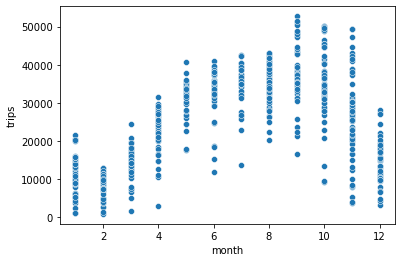

In [16]:
plt.figure()
sns.scatterplot(x = 'month', y = 'trips', data = bikes_day)
plt.show()

--> *It does not look like a linear relationship.*

**5)b) Try out six different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than six models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code.** [8pts]

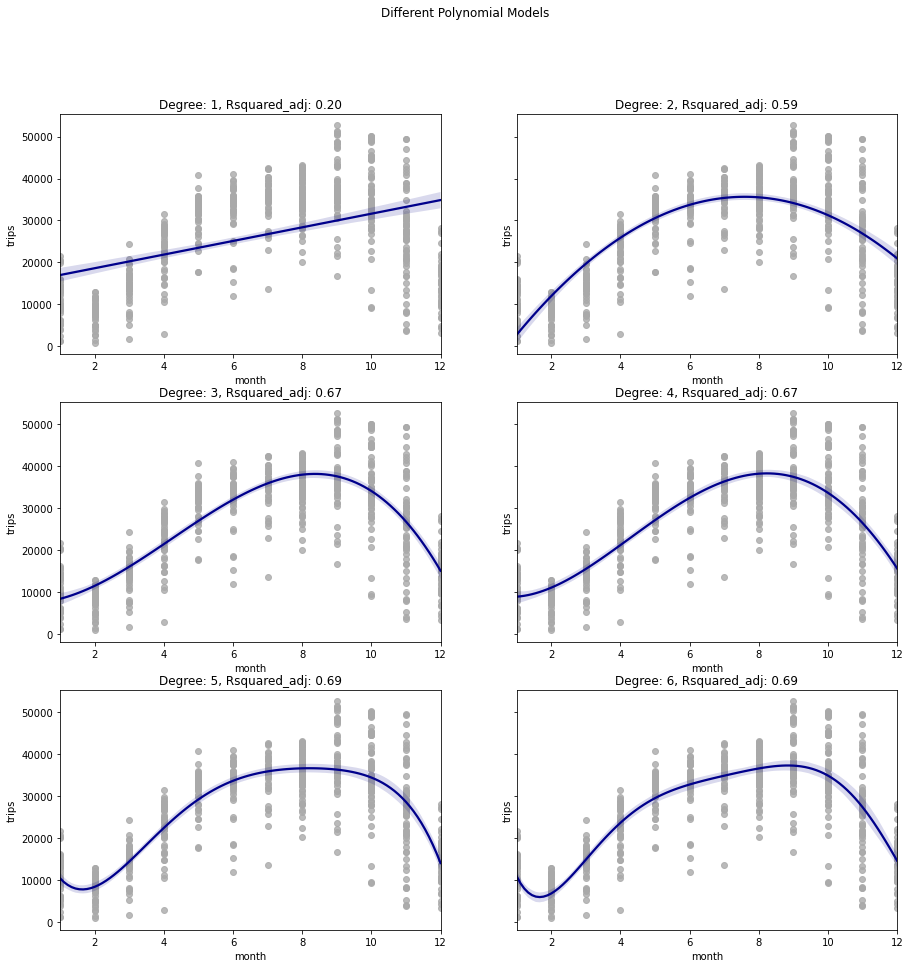

In [17]:
def poly_reg(d):
    polynomial_features= PolynomialFeatures(degree = d)
    xp = polynomial_features.fit_transform(bikes_day[['month']])
    return sm.OLS(bikes_day['trips'], xp).fit() 
    
lm_1 = poly_reg(1)
r2_1 = lm_1.rsquared_adj
lm_2 = poly_reg(2)
r2_2 = lm_2.rsquared_adj
lm_3 = poly_reg(3)
r2_3 = lm_3.rsquared_adj
lm_4 = poly_reg(4)
r2_4 = lm_4.rsquared_adj
lm_5 = poly_reg(5)
r2_5 = lm_5.rsquared_adj
lm_6 = poly_reg(6)
r2_6 = lm_6.rsquared_adj

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Different Polynomial Models')
sns.regplot(ax=axes[0, 0],x = 'month', y = 'trips', order = 1, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = bikes_day)
axes[0, 0].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(1, r2_1))
sns.regplot(ax=axes[0, 1],x = 'month', y = 'trips', order = 2, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = bikes_day)
axes[0, 1].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(2, r2_2))
sns.regplot(ax=axes[1, 0],x = 'month', y = 'trips', order = 3, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = bikes_day)
axes[1, 0].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(3, r2_3))
sns.regplot(ax=axes[1, 1],x = 'month', y = 'trips', order = 4, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = bikes_day)
axes[1, 1].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(4, r2_4))
sns.regplot(ax=axes[2, 0],x = 'month', y = 'trips', order = 5, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = bikes_day)
axes[2, 0].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(5, r2_5))
sns.regplot(ax=axes[2, 1],x = 'month', y = 'trips', order = 6, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = bikes_day)
axes[2, 1].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(6, r2_6))
plt.show()

--> *Five is the best suit because it starts to capture the decrease from month 1 - month 2. Six has the risk of overfitting.*

**5)c) Repeat 5)b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features)** [4pts]


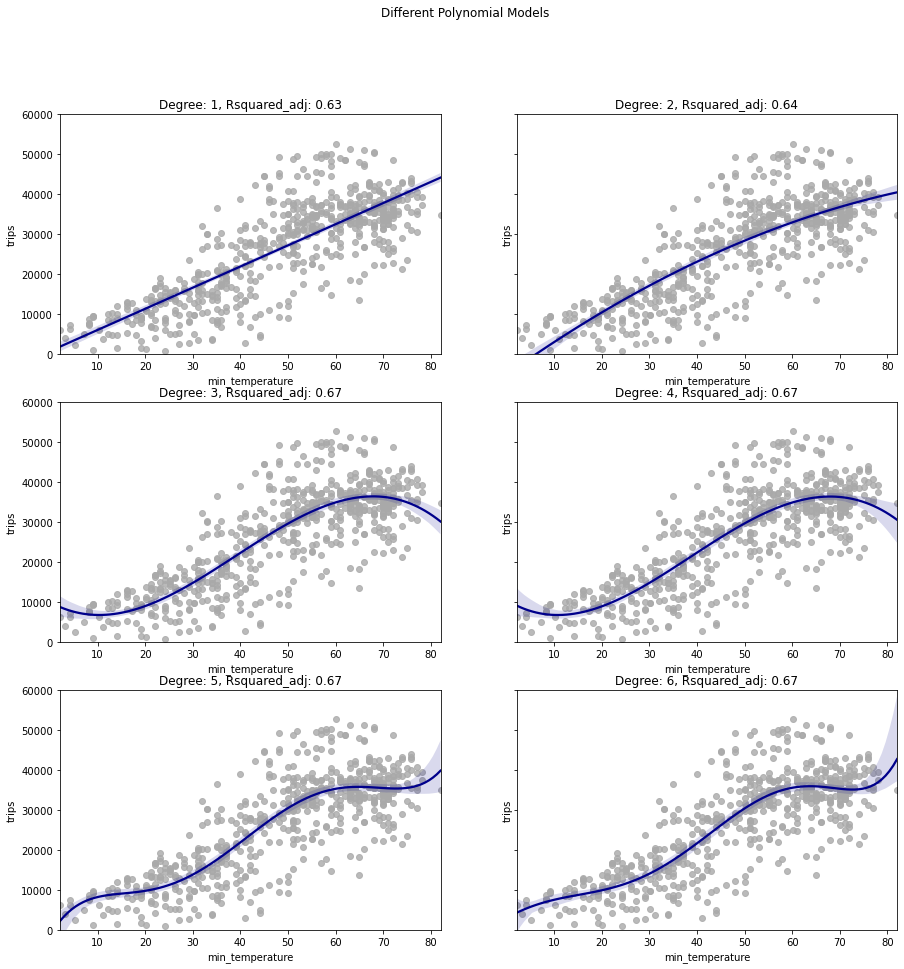

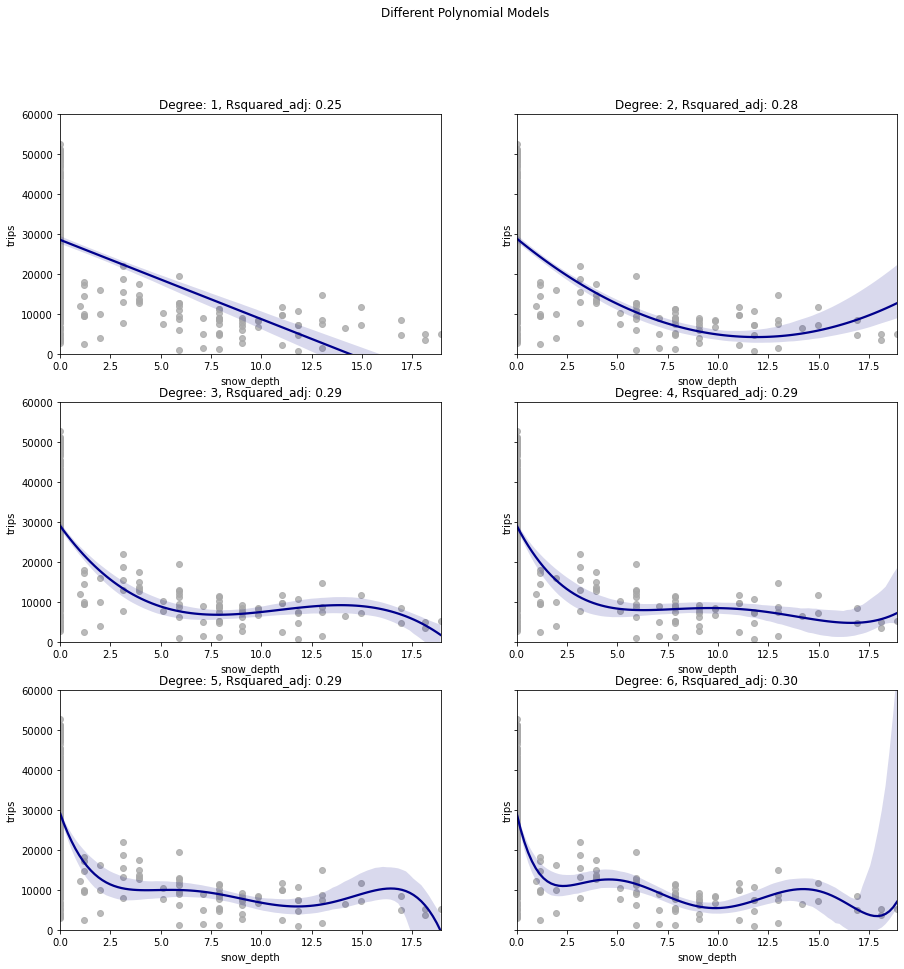

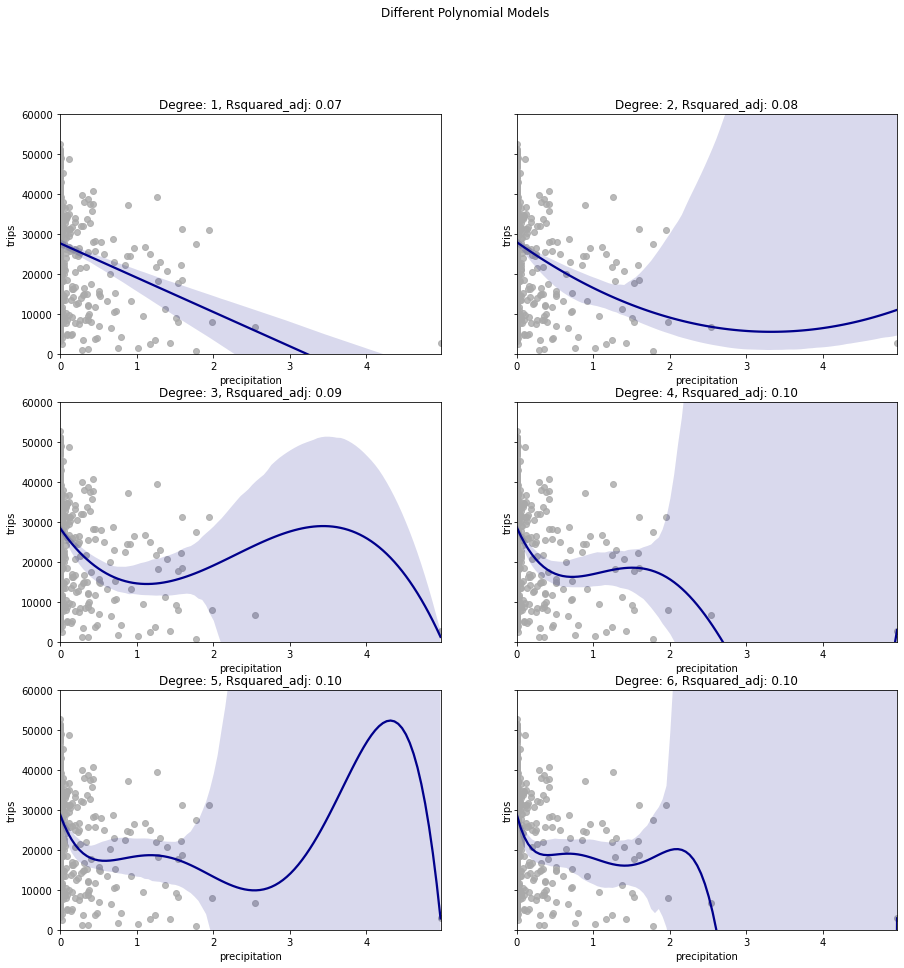

In [18]:
def decide_degree(v, data):
    def poly_reg(d):
        polynomial_features= PolynomialFeatures(degree = d)
        xp = polynomial_features.fit_transform(data[[v]])
        return sm.OLS(data['trips'], xp).fit() 
    
    lm_1 = poly_reg(1)
    r2_1 = lm_1.rsquared_adj
    lm_2 = poly_reg(2)
    r2_2 = lm_2.rsquared_adj
    lm_3 = poly_reg(3)
    r2_3 = lm_3.rsquared_adj
    lm_4 = poly_reg(4)
    r2_4 = lm_4.rsquared_adj
    lm_5 = poly_reg(5)
    r2_5 = lm_5.rsquared_adj
    lm_6 = poly_reg(6)
    r2_6 = lm_6.rsquared_adj

    fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
    fig.suptitle('Different Polynomial Models')
    sns.regplot(ax=axes[0, 0],x = v, y = 'trips', order = 1, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = data)
    axes[0, 0].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(1, r2_1))
    axes[0, 0].set(ylim=(0, 60000)) 
    sns.regplot(ax=axes[0, 1],x = v, y = 'trips', order = 2, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = data)
    axes[0, 1].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(2, r2_2))
    sns.regplot(ax=axes[1, 0],x = v, y = 'trips', order = 3, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = data)
    axes[1, 0].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(3, r2_3))
    sns.regplot(ax=axes[1, 1],x = v, y = 'trips', order = 4, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = data)
    axes[1, 1].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(4, r2_4))
    sns.regplot(ax=axes[2, 0],x = v, y = 'trips', order = 5, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = data)
    axes[2, 0].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(5, r2_5))
    sns.regplot(ax=axes[2, 1],x = v, y = 'trips', order = 6, scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"}, data = data)
    axes[2, 1].set_title('Degree: {}, Rsquared_adj: {:.2f}'.format(6, r2_6))
    
    plt.show()

decide_degree('min_temperature', bikes_day)
decide_degree('snow_depth', bikes_day)
decide_degree('precipitation', bikes_day)

--> *For min_temperature, the degree should be 3 because the R squared seizes to increase after 3.
For snow_depth, the degree should be 3 because the R squared increase very slowly after 3.
For precipitation, linear is good enough.*

**5)d) Repeat 5)c) with the weekends dataset. Do you notice any differences with 5)c)? Justify your choices and include comment on your code.** [5pts]

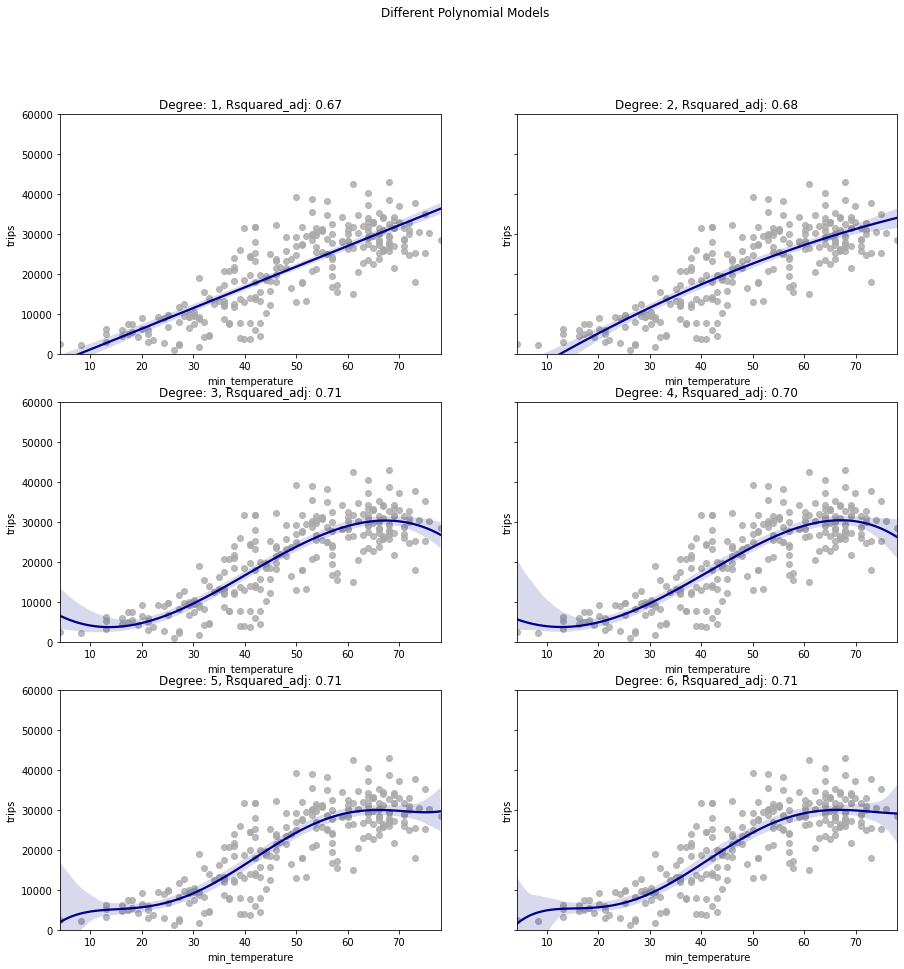

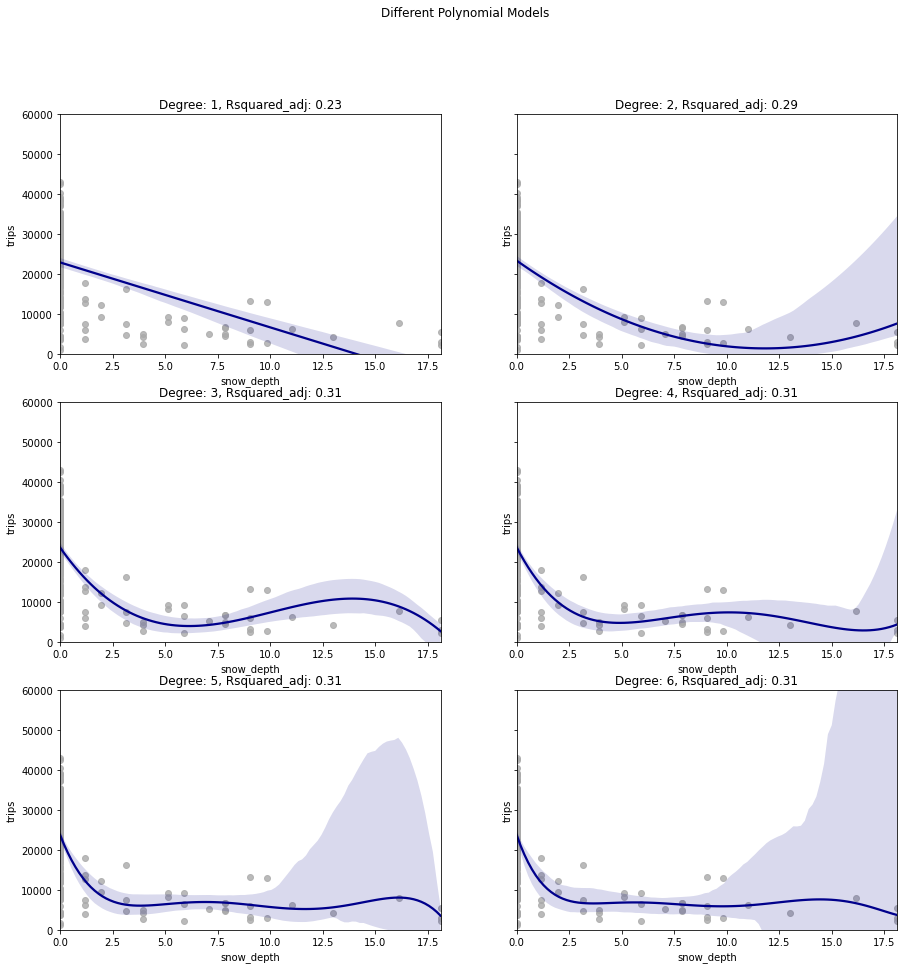

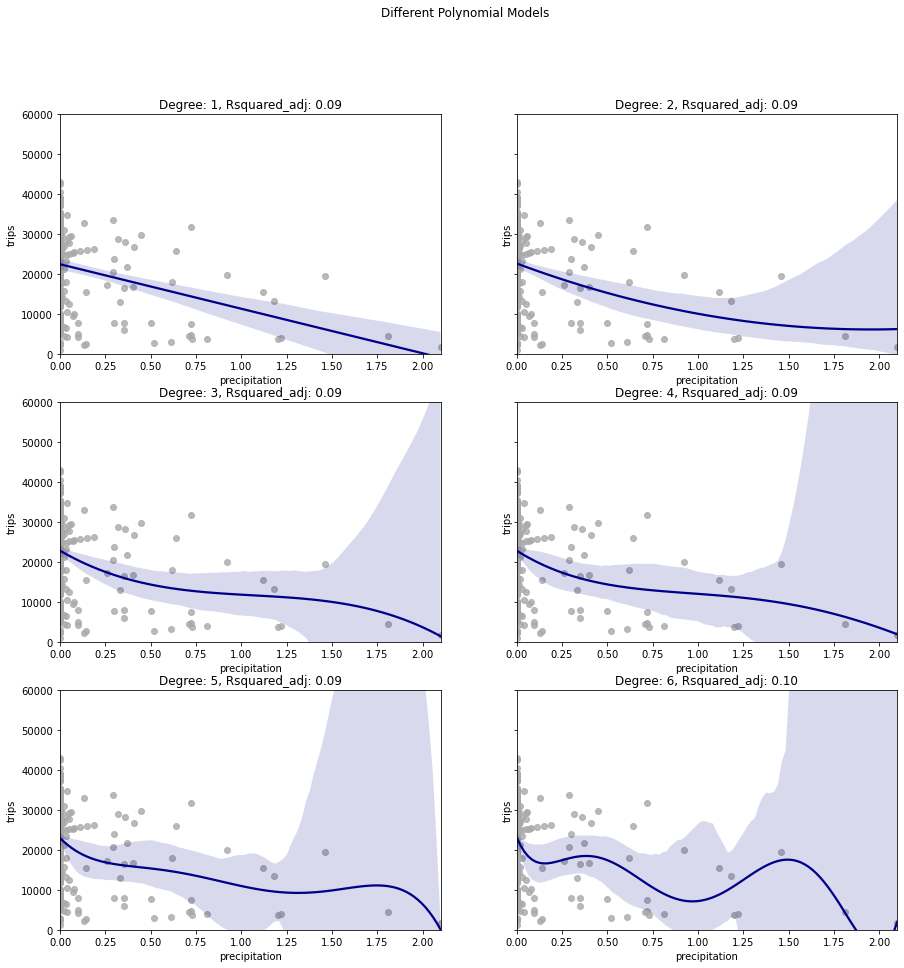

In [19]:
decide_degree('min_temperature', bikes_end)
decide_degree('snow_depth', bikes_end)
decide_degree('precipitation', bikes_end)

--> *The model trained by weekend dataset has a larger R squared than the weekday dataset, especially in the temperature. The degrees of these three variables remain the same. This may be because weekends are more associated with people's choice to hang out, and whether people hangout is closely related to the temperature.*

---

### REFERENCES
Prasad Ostwal. Polynomial regression using statsmodel. Jan 6, 2019
https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html


## Score: - / 50

### END OF HOMEWORK 1